# 线性回归 TensorFlow 2.x 实践

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(5)

%matplotlib inline
tf.__version__

'2.0.0'

In [2]:
x_data = np.linspace(-1, 1, 100)

y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

### 查看数据集

In [3]:
# x_data, y_data

### 绘图可视化

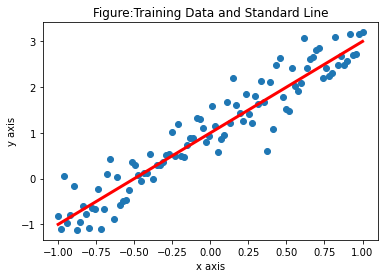

In [4]:
plt.scatter(x_data, y_data)
plt.plot(x_data, 2 * x_data + 1.0, color='red', linewidth=3)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Figure:Training Data and Standard Line')
plt.show()

### 定义模型

In [5]:
def model(x, w, b):
    return tf.multiply(x, w) + b

### 创建变量

In [6]:
w = tf.Variable(np.random.randn(), name='w0')
b = tf.Variable(0.0, name='b0')

### 定义损失函数

In [7]:
def loss(x, y, w, b):
    err = model(x, w, b) - y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)

### 定义梯度  
TensorFlow 2.x 中，使用 tf.GradientTape() 这一上下文管理器来封装需要求导的计算步骤

In [8]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

### 随机梯度下降法（SGD）训练模型 
#### 代码解读  
`delta_w, delta_b = grad(xs, ys, w, b)` 计算 [w, b] 点的梯度  
`change_w = delta_w * learning_rate`，`change_b = delta_b * learning_rate` 表示改变的步长  
`w.assign_sub(change_w)`，`b.assign_sub(change_b)` 表示负梯度方向变化所以使用 `assign_sub` 做对步长的减法  

Epoch:  1/20 Step:  10  loss:0.014715
Epoch:  1/20 Step:  20  loss:0.253290
Epoch:  1/20 Step:  30  loss:0.143054
Epoch:  1/20 Step:  40  loss:1.389589
Epoch:  1/20 Step:  50  loss:0.382215
Epoch:  1/20 Step:  60  loss:0.642117
Epoch:  1/20 Step:  70  loss:1.355959
Epoch:  1/20 Step:  80  loss:0.618715
Epoch:  1/20 Step:  90  loss:0.275236
Epoch:  1/20 Step: 100  loss:0.877006
Epoch:  2/20 Step: 110  loss:0.614993
Epoch:  2/20 Step: 120  loss:0.005396
Epoch:  2/20 Step: 130  loss:0.029839
Epoch:  2/20 Step: 140  loss:0.387822
Epoch:  2/20 Step: 150  loss:0.002012
Epoch:  2/20 Step: 160  loss:0.045372
Epoch:  2/20 Step: 170  loss:0.332095
Epoch:  2/20 Step: 180  loss:0.049918
Epoch:  2/20 Step: 190  loss:0.000254
Epoch:  2/20 Step: 200  loss:0.258763
Epoch:  3/20 Step: 210  loss:0.330364
Epoch:  3/20 Step: 220  loss:0.000476
Epoch:  3/20 Step: 230  loss:0.024453
Epoch:  3/20 Step: 240  loss:0.334342
Epoch:  3/20 Step: 250  loss:0.002467
Epoch:  3/20 Step: 260  loss:0.006043
Epoch:  3/20

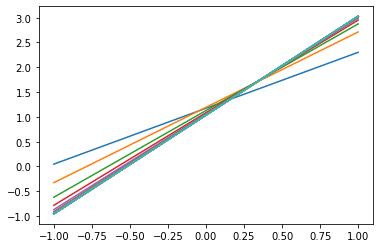

In [9]:
epochs = 20
learning_rate = 0.01
step = 0
loss_list = []
display_step = 10

for epoch in range(epochs):
    for xs, ys in zip(x_data, y_data):
        loss_ = loss(xs, ys, w, b)
        loss_list.append(loss_)
        
        delta_w, delta_b = grad(xs, ys, w, b)
        change_w = delta_w * learning_rate
        change_b = delta_b * learning_rate
        w.assign_sub(change_w)
        b.assign_sub(change_b)
        
        step += 1
        if step % display_step == 0:
            print('Epoch:%3d/%d' % (epoch + 1, epochs), 'Step:{:4}'.format(step), ' loss:%f' % loss_)
    plt.plot(x_data, w.numpy() * x_data + b.numpy())

### 查看模型参数

In [11]:
print('w:', w.numpy())
print('b:', b.numpy())

w: 1.9927113
b: 1.0359112


### 模型参数可视化

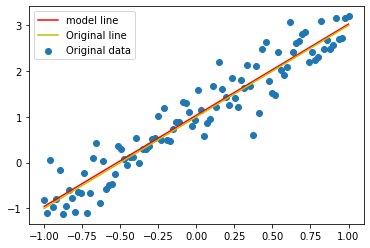

In [12]:
plt.scatter(x_data, y_data, label='Original data')
plt.plot(x_data, x_data * w.numpy() + b.numpy(), label='model line', color='r')
plt.plot(x_data, x_data * 2.0 + 1.0, label='Original line', color='y')
plt.legend(loc='best')

plt.show()

### 使用模型预测

In [13]:
x_test = 5.20

predict = model(x_test, w.numpy(), b.numpy())
print('Predict Value:%f' % predict)

target = 2.0 * x_test + 1.0
print('Target Value:%f' % target)

Predict Value:11.398010
Target Value:11.400000


### 损失值 loss 可视化

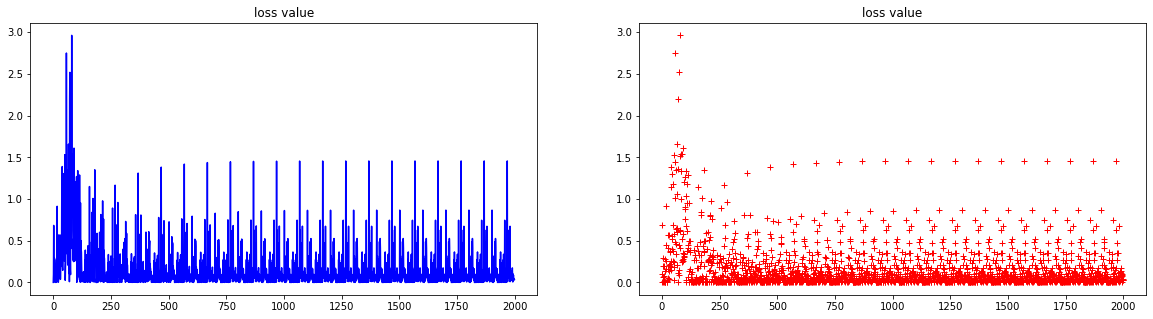

In [14]:
fig = plt.gcf()
fig.set_size_inches(20, 5)
ax_1 = plt.subplot(1, 2, 1)
ax_1.plot(loss_list, 'b')
title = 'loss value'
ax_1.set_title(title)
ax_2 = plt.subplot(1, 2, 2)
ax_2.plot(loss_list, 'r+')
ax_2.set_title(title)
plt.show()

### 全批量梯度下降法（BGD）训练模型  
你需要重启 kernel 来清除已训练保存的变量，前面定义的函数没有任何改变，需要执行，或者执行下面 Python 代码重新定义 w，b的值

In [28]:
w = tf.Variable(np.random.randn(), name='w0')
b = tf.Variable(0.0, name='b0')

Epoch:  1/100  loss:6.018502
Epoch:  2/100  loss:5.493067
Epoch:  3/100  loss:5.027903
Epoch:  4/100  loss:4.614203
Epoch:  5/100  loss:4.244658
Epoch:  6/100  loss:3.913182
Epoch:  7/100  loss:3.614690
Epoch:  8/100  loss:3.344920
Epoch:  9/100  loss:3.100287
Epoch: 10/100  loss:2.877762
Epoch: 11/100  loss:2.674772
Epoch: 12/100  loss:2.489128
Epoch: 13/100  loss:2.318952
Epoch: 14/100  loss:2.162629
Epoch: 15/100  loss:2.018763
Epoch: 16/100  loss:1.886140
Epoch: 17/100  loss:1.763700
Epoch: 18/100  loss:1.650511
Epoch: 19/100  loss:1.545753
Epoch: 20/100  loss:1.448699
Epoch: 21/100  loss:1.358699
Epoch: 22/100  loss:1.275175
Epoch: 23/100  loss:1.197607
Epoch: 24/100  loss:1.125526
Epoch: 25/100  loss:1.058508
Epoch: 26/100  loss:0.996168
Epoch: 27/100  loss:0.938156
Epoch: 28/100  loss:0.884152
Epoch: 29/100  loss:0.833864
Epoch: 30/100  loss:0.787023
Epoch: 31/100  loss:0.743382
Epoch: 32/100  loss:0.702714
Epoch: 33/100  loss:0.664811
Epoch: 34/100  loss:0.629479
Epoch: 35/100 

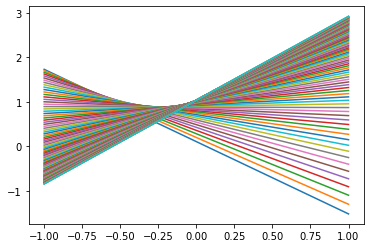

In [29]:
epochs = 100
learning_rate = 0.05
step = 0
loss_list = []

for epoch in range(epochs):
    loss_ = loss(x_data, y_data, w, b)
    loss_list.append(loss_)

    delta_w, delta_b = grad(x_data, y_data, w, b)
    change_w = delta_w * learning_rate
    change_b = delta_b * learning_rate
    w.assign_sub(change_w)
    b.assign_sub(change_b)

    print('Epoch:%3d/%d' % (epoch + 1, epochs), ' loss:%f' % loss_)
    plt.plot(x_data, w.numpy() * x_data + b.numpy())

### 查看模型参数

In [31]:
print('w:', w.numpy())
print('b:', b.numpy())

w: 1.887126
b: 1.0365912


### 模型参数可视化

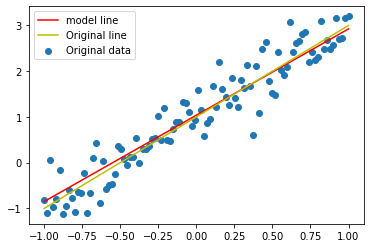

In [32]:
plt.scatter(x_data, y_data, label='Original data')
plt.plot(x_data, x_data * w.numpy() + b.numpy(), label='model line', color='r')
plt.plot(x_data, x_data * 2.0 + 1.0, label='Original line', color='y')
plt.legend(loc='best')

plt.show()

### 使用模型预测

In [33]:
x_test = 5.20

predict = model(x_test, w.numpy(), b.numpy())
print('Predict Value:%f' % predict)

target = 2.0 * x_test + 1.0
print('Target Value:%f' % target)

Predict Value:10.849647
Target Value:11.400000


### 损失值 loss 可视化

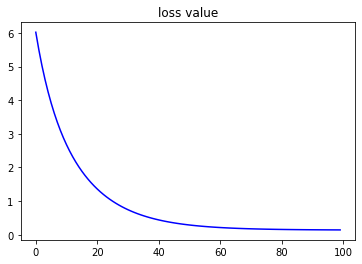

In [35]:
plt.plot(loss_list, 'b')
title = 'loss value'
plt.title(title)
plt.show()